In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [272]:
sales_data = pd.read_csv('Thesis-Fashion Files/Database/visuelle2/sales.csv')
customer_data = pd.read_csv('Thesis-Fashion Files/Database/visuelle2/customer_data.csv')
#weather_data = pd.read_csv('Thesis-Fashion Files/Database/visuelle2/vis2_weather_data.csv')
price_discount_data = pd.read_csv('Thesis-Fashion Files/Database/visuelle2/price_discount_series.csv')
Restocks_data = pd.read_csv('Thesis-Fashion Files/Database/visuelle2/restocks.csv')
train_data = pd.read_csv('Thesis-Fashion Files/Database/visuelle2/stfore_train.csv')
test_data = pd.read_csv('Thesis-Fashion Files/Database/visuelle2/stfore_test.csv')
#gtrends_data = pd.read_csv('Thesis-Fashion Files/Database/visuelle2/vis2_gtrends_data.csv')
normalization_scale = np.load('Thesis-Fashion Files/Database/visuelle2/stfore_sales_norm_scalar.npy', allow_pickle=True)

In [275]:
normalization_scale

array(53.)

In [273]:
sales_data['restock'].describe()

count    106850.000000
mean         22.436022
std          16.970656
min           1.000000
25%          13.000000
50%          18.000000
75%          26.000000
max         389.000000
Name: restock, dtype: float64

In [274]:
train_data['restock'].describe()

count    96166.000000
mean         0.431776
std          0.326132
min          0.018868
25%          0.245283
50%          0.339623
75%          0.490566
max          7.339623
Name: restock, dtype: float64

In [276]:
sales_data

,Unnamed: 0,external_code,retail,season,category,color,image_path,fabric,release_date,restock,0,1,2,3,4,5,6,7,8,9,10,11
0,0,5,36,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,22,1.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
1,1,2,51,SS17,long sleeve,violet,PE17/00002.png,acrylic,2016-11-28,17,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2,5,10,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,15,1.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,3,9,41,SS17,culottes,yellow,PE17/00009.png,scuba crepe,2016-11-28,32,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,4,5,13,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,26,1.0,2.0,4.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106845,106845,5504,51,AW19,medium coat,grey,AI19/05504.png,foam rubber,2019-12-30,12,2.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
106846,106846,5558,10,AW19,medium coat,black,AI19/05558.png,foam rubber,2019-12-30,12,3.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
106847,106847,4988,108,AW19,medium coat,black,AI19/04988.png,cloth,2019-12-30,15,1.0,0.0,0.0,1.0,2.0,3.0,5.0,2.0,0.0,0.0,0.0,0.0
106848,106848,4280,105,AW19,culottes,blue,AI19/04280.png,light jeans,2019-12-30,1,1.0,2.0,4.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [277]:
price_discount_data

,external_code,retail,0,1,2,3,4,5,6,7,8,9,10,11,price
0,5,36,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.054944
1,2,51,0.5,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.20,0.054944
2,5,10,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.054944
3,9,41,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.043951
4,5,13,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.054944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106845,5504,51,0.0,0.0,0.29,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.138405
106846,5558,10,0.0,0.0,0.00,0.00,0.00,0.29,0.29,0.52,0.60,0.60,0.60,0.60,0.138405
106847,4988,108,0.0,0.0,0.00,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.076843
106848,4280,105,0.0,0.0,0.00,0.00,0.40,0.10,0.40,0.40,0.40,0.40,0.40,0.40,0.043863


In [278]:
Restocks_data

,external_code,retail,week,year,qty
0,3642,30,50,2018,5
1,3642,30,51,2018,6
2,3642,30,1,2019,2
3,3642,30,2,2019,3
4,3642,30,4,2019,4
...,...,...,...,...,...
949761,5073,64,2,2020,2
949762,5073,41,42,2019,7
949763,5073,41,45,2019,2
949764,5073,23,42,2019,5


In [279]:
customer_data

,customer,retail,external_code,data,qty
0,1,0,940,2017-06-10 12:41:57,1
1,1,0,718,2017-06-10 12:41:57,1
2,1,0,825,2017-06-10 12:54:11,1
3,2,1,471,2017-08-03 11:37:27,1
4,2,1,613,2017-08-03 11:37:27,1
...,...,...,...,...,...
3184157,667076,20,5356,2021-03-01 16:49:38,1
3184158,667077,20,5356,2021-03-04 19:36:50,1
3184159,667078,20,4630,2021-03-10 12:43:44,1
3184160,667082,12,4539,2021-04-27 16:02:16,1


In [280]:
gtrends_data

,date,long sleeve,culottes,miniskirt,short sleeves,printed shirt,short cardigan,solid color top,trapeze dress,sleeveless,long cardigan,sheath dress,short coat,medium coat,doll dress,long dress,shorts,long coat,jumpsuit,drop sleeve,patterned top,kimono dress,medium cardigan,shirt dress,maxi,capris,gitana skirt,long duster,yellow,brown,blue,grey,green,black,red,white,orange,violet,acrylic,scuba crepe,tulle,angora,faux leather,georgette,lurex,nice,crepe,satin cotton,silky satin,fur,matte jersey,plisse,velvet,lace,cotton,piquet,plush,bengaline,jacquard,frise,technical,cady,dark jeans,light jeans,ity,plumetis,polyviscous,dainetto,webbing,foam rubber,chanel,marocain,macrame,embossed,heavy jeans,nylon,tencel,paillettes,chambree,chine crepe,muslin cotton or silk,linen,tactel,viscose twill,cloth,mohair,mutton,scottish,milano stitch,devore,hron,ottoman,fluid,flamed,fluid polyviscous,shiny jersey,goose
0,2015-10-05,55.0,41.0,66.0,58.0,58.0,22.0,24.0,43.0,66.0,74.0,42.0,44.0,10.0,73.0,70.0,38.0,36.0,30.0,11.0,75.0,25.0,0.0,78.6,63.0,37.0,0.0,24.0,83,66,77,18,79,25,61,77,70,56,57,18,81,65,50,25,23,20,35,61,10,54,35,26,54,70,68,33,35,13,73,80,89,29,50,63,62,20,-1.0,0,55,46,73,81,54,56,55,86,36,18,0,20,-1.0,52,33,0,82,62,45,57,0,29,17,57,80,49,-1.0,0,34
1,2015-10-12,55.0,44.0,73.0,71.0,61.0,31.0,37.0,21.2,63.0,59.0,52.0,47.0,29.0,85.0,72.0,37.0,33.0,27.0,33.0,83.0,40.0,0.0,75.0,64.0,32.0,0.0,14.0,80,66,95,18,76,26,62,77,71,57,58,0,86,63,52,31,21,18,37,37,59,58,70,38,54,68,69,23,38,27,76,76,89,26,56,66,72,30,-1.0,0,54,72,72,80,56,74,32,85,39,12,0,27,-1.0,55,48,0,82,66,43,54,0,17,14,61,80,41,-1.0,0,39
2,2015-10-19,60.0,42.0,73.0,62.0,61.0,43.0,37.0,27.4,47.0,71.0,37.0,46.0,29.0,100.0,79.0,36.0,39.0,31.0,55.0,71.0,39.0,0.0,68.8,66.0,23.0,0.0,34.0,83,66,92,18,76,27,62,77,67,58,59,0,81,70,52,27,19,18,43,30,29,59,52,33,53,100,68,26,38,17,86,62,81,27,59,66,63,30,-1.0,0,57,43,69,83,48,66,23,86,32,14,30,47,-1.0,54,35,48,81,63,46,55,0,21,23,63,79,52,-1.0,33,41
3,2015-10-26,57.0,44.0,68.0,51.0,55.0,19.0,37.0,59.8,54.0,64.0,38.0,43.0,43.0,96.0,74.0,36.0,42.0,31.0,22.0,73.0,42.0,17.0,71.8,65.0,23.0,0.0,43.0,82,67,70,17,74,28,62,76,69,52,62,17,95,70,60,32,20,17,44,24,39,63,35,33,54,73,68,30,39,13,73,76,83,33,66,53,72,30,-1.0,0,54,72,69,81,46,63,46,85,38,16,0,27,-1.0,56,29,0,84,61,44,55,0,26,14,58,76,33,-1.0,32,37
4,2015-11-02,49.0,39.0,66.0,39.0,63.0,16.0,37.0,44.0,51.0,67.0,49.0,46.0,0.0,59.0,70.0,34.0,35.0,32.0,22.0,71.0,37.0,34.0,64.2,67.0,21.0,0.0,34.0,76,66,69,17,77,32,60,77,70,56,57,0,66,66,55,33,19,18,35,55,39,63,0,36,58,66,72,27,39,10,78,78,83,32,53,56,72,25,-1.0,0,66,64,69,91,48,55,47,85,34,20,0,27,-1.0,61,33,0,85,61,46,55,0,18,18,60,80,37,-1.0,98,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2019-11-18,91.0,53.0,37.0,66.0,72.0,66.0,30.0,10.8,67.0,79.0,40.0,73.0,59.0,67.0,94.0,39.0,89.0,84.0,63.0,86.0,47.0,0.0,79.8,75.0,23.0,0.0,75.0,86,66,79,17,80,47,57,82,48,57,81,43,70,60,89,43,77,18,41,50,24,81,14,62,64,63,88,35,71,71,84,60,77,25,83,63,84,41,-1.0,0,64,48,76,56,89,87,64,76,68,38,0,27,-1.0,80,63,0,94,82,57,63,0,19,19,86,92,49,-1.0,27,60
216,2019-11-25,94.0,45.0,35.0,56.0,67.0,35.0,50.0,25.0,63.0,83.0,46.0,83.0,51.0,78.0,91.0,44.0,92.0,100.0,45.0,79.0,45.0,14.0,81.8,81.0,22.0,0.0,47.0,84,69,80,19,91,98,58,86,50,59,84,100,73,63,93,51,78,18,37,54,32,86,0,72,69,65,93,25,89,95,88,63,65,18,83,93,66,41,-1.0,0,48,56,86,54,77,91,25,75,87,49,49,27,-1.0,79,84,0,98,84,57,63,0,22,25,78,83,30,-1.0,80,61
217,2019-12-02,100.0,47.0,28.0,73.0,71.0,59.0,20.0,9.4,72.0,86.0,43.0,68.0,44.0,61.0,94.0,45.0,100.0,93.0,73.0,89.0,40.0,41.0,78.8,78.0,24.0,0.0,52.0,83,62,79,16,75,33,59,85,50,68,92,29,75,65,100,43,100,18,38,25,

In [281]:
result1 = pd.merge(sales_data, price_discount_data, on=['external_code', 'retail'])

In [282]:
result1.head(10)

,Unnamed: 0,external_code,retail,season,category,color,image_path,fabric,release_date,restock,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,price
0,0,5,36,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,22,1.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054944
1,1,2,51,SS17,long sleeve,violet,PE17/00002.png,acrylic,2016-11-28,17,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.50,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.054944
2,2,5,10,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,15,1.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054944
3,3,9,41,SS17,culottes,yellow,PE17/00009.png,scuba crepe,2016-11-28,32,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043951
4,4,5,13,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,26,1.0,2.0,4.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054944
5,5,5,41,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,15,2.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.25,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054944
6,6,2,41,SS17,long sleeve,violet,PE17/00002.png,acrylic,2016-11-28,19,1.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054944
7,7,2,36,SS17,long sleeve,violet,PE17/00002.png,acrylic,2016-11-28,15,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.00,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054944
8,8,8,10,SS17,long sleeve,green,PE17/00008.png,acrylic,2016-11-28,24,1.0,1.0,0.0,6.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.054944
9,9,9,2,SS17,culottes,yellow,PE17/00009.png,scuba crepe,2016-12-05,21,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.043951


In [283]:
result1.columns

Index(['Unnamed: 0', 'external_code', 'retail', 'season', 'category', 'color',
       'image_path', 'fabric', 'release_date', 'restock', '0_x', '1_x', '2_x',
       '3_x', '4_x', '5_x', '6_x', '7_x', '8_x', '9_x', '10_x', '11_x', '0_y',
       '1_y', '2_y', '3_y', '4_y', '5_y', '6_y', '7_y', '8_y', '9_y', '10_y',
       '11_y', 'price'],
      dtype='object')

In [284]:
result1 = result1.drop(['Unnamed: 0'], axis=1)

In [285]:
result1

,external_code,retail,season,category,color,image_path,fabric,release_date,restock,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,price
0,5,36,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,22,1.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.054944
1,2,51,SS17,long sleeve,violet,PE17/00002.png,acrylic,2016-11-28,17,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.20,0.054944
2,5,10,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,15,1.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.054944
3,9,41,SS17,culottes,yellow,PE17/00009.png,scuba crepe,2016-11-28,32,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.043951
4,5,13,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,26,1.0,2.0,4.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.054944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106845,5504,51,AW19,medium coat,grey,AI19/05504.png,foam rubber,2019-12-30,12,2.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.138405
106846,5558,10,AW19,medium coat,black,AI19/05558.png,foam rubber,2019-12-30,12,3.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.29,0.29,0.52,0.60,0.60,0.60,0.60,0.138405
106847,4988,108,AW19,medium coat,black,AI19/04988.png,cloth,2019-12-30,15,1.0,0.0,0.0,1.0,2.0,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.076843
106848,4280,105,AW19,culottes,blue,AI19/04280.png,light jeans,2019-12-30,1,1.0,2.0,4.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.40,0.10,0.40,0.40,0.40,0.40,0.40,0.40,0.043863


In [286]:
Final_Result = pd.merge(result1, Restocks_data, on=['external_code', 'retail'])

In [287]:
Final_Result

,external_code,retail,season,category,color,image_path,fabric,release_date,restock,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,price,week,year,qty
0,5,36,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,22,1.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.054944,48,2016,6
1,5,36,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,22,1.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.054944,50,2016,14
2,5,36,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,22,1.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.054944,2,2017,2
3,2,51,SS17,long sleeve,violet,PE17/00002.png,acrylic,2016-11-28,17,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.20,0.054944,48,2016,6
4,2,51,SS17,long sleeve,violet,PE17/00002.png,acrylic,2016-11-28,17,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.20,0.054944,51,2016,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412788,5558,10,AW19,medium coat,black,AI19/05558.png,foam rubber,2019-12-30,12,3.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.29,0.29,0.52,0.60,0.60,0.60,0.60,0.138405,49,2019,12
412789,4988,108,AW19,medium coat,black,AI19/04988.png,cloth,2019-12-30,15,1.0,0.0,0.0,1.0,2.0,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.076843,41,2019,13
412790,4988,108,AW19,medium coat,black,AI19/04988.png,cloth,2019-12-30,15,1.0,0.0,0.0,1.0,2.0,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.076843,6,2021,2
412791,4280,105,AW19,culottes,blue,AI19/04280.png,light jeans,2019-12-30,1,1.0,2.0,4.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.40,0.10,0.40,0.40,0.40,0.40,0.40,0.40,0.043863,5,2020,1


In [288]:
train_data

,external_code,retail,season,category,color,image_path,fabric,release_date,restock,0,1,2,3,4,5,6,7,8,9,10,11
0,5,36,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,0.415094,0.018868,0.056604,0.018868,0.018868,0.037736,0.018868,0.000000,0.000000,0.037736,0.000000,0.000000,0.000000
1,2,51,SS17,long sleeve,violet,PE17/00002.png,acrylic,2016-11-28,0.320755,0.018868,0.018868,0.018868,0.000000,0.000000,0.037736,0.000000,0.000000,0.000000,0.018868,0.018868,0.000000
2,5,10,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,0.283019,0.018868,0.056604,0.018868,0.000000,0.018868,0.018868,0.018868,0.018868,0.018868,0.000000,0.000000,0.018868
3,9,41,SS17,culottes,yellow,PE17/00009.png,scuba crepe,2016-11-28,0.603774,0.018868,0.018868,0.018868,0.018868,0.000000,0.000000,0.000000,0.018868,0.000000,0.018868,0.000000,0.000000
4,5,13,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,0.490566,0.018868,0.037736,0.075472,0.000000,0.056604,0.000000,0.037736,0.018868,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96161,5444,3,AW19,long sleeve,black,AI19/05444.png,georgette,2019-11-11,0.226415,0.037736,0.018868,0.037736,0.000000,0.000000,0.018868,0.037736,0.037736,0.000000,0.037736,0.000000,0.000000
96162,5005,61,AW19,short sleeves,white,AI19/05005.png,nice,2019-11-11,0.132075,0.018868,0.018868,0.000000,0.000000,0.000000,0.018868,0.018868,0.056604,0.000000,-0.018868,0.000000,0.000000
96163,5365,42,AW19,culottes,blue,AI19/05365.png,dark jeans,2019-11-11,0.169811,0.037736,0.000000,0.037736,0.000000,0.018868,0.018868,0.000000,0.000000,0.000000,0.018868,0.018868,0.000000
96164,5005,28,AW19,short sleeves,white,AI19/05005.png,nice,2019-11-11,0.169811,0.018868,0.018868,0.000000,0.018868,0.000000,0.037736,0.000000,0.000000,0.018868,0.018868,0.000000,0.000000


In [289]:
test_data

,external_code,retail,season,category,color,image_path,fabric,release_date,restock,0,1,2,3,4,5,6,7,8,9,10,11
0,5198,100,SS19,culottes,grey,PE19/05198.png,linen,2019-05-06,0.320755,0.018868,0.018868,0.018868,0.018868,0.037736,0.037736,0.018868,0.037736,0.056604,0.000000,0.000000,0.018868
1,5180,74,SS19,long dress,black,PE19/05180.png,tulle,2019-05-06,1.792453,0.113208,0.056604,0.113208,0.113208,0.094340,0.169811,0.094340,0.056604,0.301887,0.283019,0.113208,0.000000
2,5159,43,SS19,culottes,white,PE19/05159.png,linen,2019-05-06,0.207547,0.018868,0.000000,0.000000,0.018868,0.000000,0.018868,0.000000,0.037736,0.018868,0.018868,0.000000,0.000000
3,5207,30,SS19,doll dress,black,PE19/05207.png,tulle,2019-05-06,1.188679,0.037736,0.018868,0.056604,0.037736,0.169811,0.113208,0.000000,0.113208,0.188679,0.132075,0.018868,0.000000
4,5172,2,SS19,jumpsuit,black,PE19/05172.png,scuba crepe,2019-05-06,0.358491,0.094340,0.000000,0.000000,0.075472,0.037736,0.000000,0.000000,0.018868,0.000000,0.018868,0.018868,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,5504,51,AW19,medium coat,grey,AI19/05504.png,foam rubber,2019-12-30,0.226415,0.037736,0.018868,0.018868,0.056604,0.056604,0.018868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10680,5558,10,AW19,medium coat,black,AI19/05558.png,foam rubber,2019-12-30,0.226415,0.056604,0.018868,0.000000,0.018868,0.000000,0.018868,0.000000,0.037736,0.018868,0.000000,0.000000,0.000000
10681,4988,108,AW19,medium coat,black,AI19/04988.png,cloth,2019-12-30,0.283019,0.018868,0.000000,0.000000,0.018868,0.037736,0.056604,0.094340,0.037736,0.000000,0.000000,0.000000,0.000000
10682,4280,105,AW19,culottes,blue,AI19/04280.png,light jeans,2019-12-30,0.018868,0.018868,0.037736,0.075472,0.018868,0.037736,0.056604,0.018868,0.000000,0.000000,0.000000,0.000000,0.000000


In [290]:
# Convert to datetime
gtrends_data['date'] = pd.to_datetime(gtrends_data['date'])
train_data['release_date'] = pd.to_datetime(train_data['release_date'])
test_data['release_date'] = pd.to_datetime(test_data['release_date'])
Final_Result['release_date'] = pd.to_datetime(Final_Result['release_date'])

# Extract the year from 'release_date' and create a new column 'release_year'
train_data['release_year'] = train_data['release_date'].dt.year
test_data['release_year'] = test_data['release_date'].dt.year

In [291]:
train_data

,external_code,retail,season,category,color,image_path,fabric,release_date,restock,0,1,2,3,4,5,6,7,8,9,10,11,release_year
0,5,36,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,0.415094,0.018868,0.056604,0.018868,0.018868,0.037736,0.018868,0.000000,0.000000,0.037736,0.000000,0.000000,0.000000,2016
1,2,51,SS17,long sleeve,violet,PE17/00002.png,acrylic,2016-11-28,0.320755,0.018868,0.018868,0.018868,0.000000,0.000000,0.037736,0.000000,0.000000,0.000000,0.018868,0.018868,0.000000,2016
2,5,10,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,0.283019,0.018868,0.056604,0.018868,0.000000,0.018868,0.018868,0.018868,0.018868,0.018868,0.000000,0.000000,0.018868,2016
3,9,41,SS17,culottes,yellow,PE17/00009.png,scuba crepe,2016-11-28,0.603774,0.018868,0.018868,0.018868,0.018868,0.000000,0.000000,0.000000,0.018868,0.000000,0.018868,0.000000,0.000000,2016
4,5,13,SS17,long sleeve,grey,PE17/00005.png,acrylic,2016-11-28,0.490566,0.018868,0.037736,0.075472,0.000000,0.056604,0.000000,0.037736,0.018868,0.000000,0.000000,0.000000,0.000000,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96161,5444,3,AW19,long sleeve,black,AI19/05444.png,georgette,2019-11-11,0.226415,0.037736,0.018868,0.037736,0.000000,0.000000,0.018868,0.037736,0.037736,0.000000,0.037736,0.000000,0.000000,2019
96162,5005,61,AW19,short sleeves,white,AI19/05005.png,nice,2019-11-11,0.132075,0.018868,0.018868,0.000000,0.000000,0.000000,0.018868,0.018868,0.056604,0.000000,-0.018868,0.000000,0.000000,2019
96163,5365,42,AW19,culottes,blue,AI19/05365.png,dark jeans,2019-11-11,0.169811,0.037736,0.000000,0.037736,0.000000,0.018868,0.018868,0.000000,0.000000,0.000000,0.018868,0.018868,0.000000,2019
96164,5005,28,AW19,short sleeves,white,AI19/05005.png,nice,2019-11-11,0.169811,0.018868,0.018868,0.000000,0.018868,0.000000,0.037736,0.000000,0.000000,0.018868,0.018868,0.000000,0.000000,2019


## EDA

- Missing Values
- All The Numerical Variables
- Distribution of the Numerical Variables
- Categorical Variables
- Cardinality of Categorical Variables
- Outliers
- Relationship between independent and dependent feature

***Missing Values***

In [292]:
#Making list of features which has missing value.
features_with_na=[features for features in Final_Result.columns if Final_Result[features].isnull().sum()>1]
#Printing the feature name.
for feature in features_with_na:
    print(feature, np.round(Final_Result[feature].isnull().sum()),  'missing values')

0_y 5 missing values


In [293]:
np.round(price_discount_data.isnull().sum())

external_code    0
retail           0
0                1
1                0
2                0
3                0
4                0
5                0
6                0
7                0
8                0
9                0
10               0
11               0
price            0
dtype: int64

In [294]:
#Making list of features which has missing value.
features_with_na2=[features for features in train_data.columns if train_data[features].isnull().sum()>1]
#Printing the feature name.
for feature in features_with_na2:
    print(feature, np.round(train_data[feature].isnull().sum()),  'missing values')

- There are 5 missing values in Final_Result dataset, while none in train_data.
- This tells that after combing the dataset the null value increased to 5, whereas initially there was only 1 missing value in price_discount_data column '0'[i.e.'0_y'] 

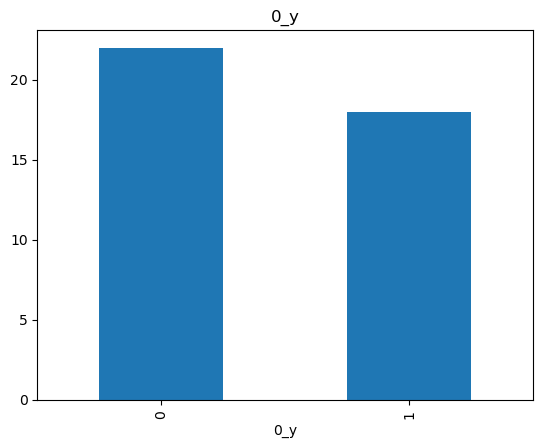

In [295]:
#find the relationship between missing values and restock
for feature in features_with_na:
    data = Final_Result.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean restock where the information is missing or present
    data.groupby(feature)['restock'].median().plot.bar()
    plt.title(feature)
    plt.show()

- The bar labeled 0 is higher than the bar labeled 1, indicating that the median 'restock' value is higher where the feature's information is present. This could imply that the presence of certain information might be associated with higher restock levels.
- In my opinion: When there is a discount put on an item. It has better sales and more restock. 

***Numerical Variables***

In [296]:
# Making list of numerical variables
numerical_features = [feature for feature in Final_Result.columns if Final_Result[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
Final_Result[numerical_features].head()

Number of numerical variables:  32


,external_code,retail,release_date,restock,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,price,week,year,qty
0,5,36,2016-11-28,22,1.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054944,48,2016,6
1,5,36,2016-11-28,22,1.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054944,50,2016,14
2,5,36,2016-11-28,22,1.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054944,2,2017,2
3,2,51,2016-11-28,17,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.054944,48,2016,6
4,2,51,2016-11-28,17,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.054944,51,2016,4


In [297]:
# Making list of numerical variables
numerical_features2 = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features2))

# visualise the numerical variables
train_data[numerical_features2].head()

Number of numerical variables:  17


,external_code,retail,release_date,restock,0,1,2,3,4,5,6,7,8,9,10,11,release_year
0,5,36,2016-11-28,0.415094,0.018868,0.056604,0.018868,0.018868,0.037736,0.018868,0.000000,0.000000,0.037736,0.000000,0.000000,0.000000,2016
1,2,51,2016-11-28,0.320755,0.018868,0.018868,0.018868,0.000000,0.000000,0.037736,0.000000,0.000000,0.000000,0.018868,0.018868,0.000000,2016
2,5,10,2016-11-28,0.283019,0.018868,0.056604,0.018868,0.000000,0.018868,0.018868,0.018868,0.018868,0.018868,0.000000,0.000000,0.018868,2016
3,9,41,2016-11-28,0.603774,0.018868,0.018868,0.018868,0.018868,0.000000,0.000000,0.000000,0.018868,0.000000,0.018868,0.000000,0.000000,2016
4,5,13,2016-11-28,0.490566,0.018868,0.037736,0.075472,0.000000,0.056604,0.000000,0.037736,0.018868,0.000000,0.000000,0.000000,0.000000,2016


In [298]:
# Making list of numerical variables
numerical_features3 = [feature for feature in test_data.columns if test_data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features3))

# visualise the numerical variables
test_data[numerical_features3].head()

Number of numerical variables:  17


,external_code,retail,release_date,restock,0,1,2,3,4,5,6,7,8,9,10,11,release_year
0,5198,100,2019-05-06,0.320755,0.018868,0.018868,0.018868,0.018868,0.037736,0.037736,0.018868,0.037736,0.056604,0.000000,0.000000,0.018868,2019
1,5180,74,2019-05-06,1.792453,0.113208,0.056604,0.113208,0.113208,0.094340,0.169811,0.094340,0.056604,0.301887,0.283019,0.113208,0.000000,2019
2,5159,43,2019-05-06,0.207547,0.018868,0.000000,0.000000,0.018868,0.000000,0.018868,0.000000,0.037736,0.018868,0.018868,0.000000,0.000000,2019
3,5207,30,2019-05-06,1.188679,0.037736,0.018868,0.056604,0.037736,0.169811,0.113208,0.000000,0.113208,0.188679,0.132075,0.018868,0.000000,2019
4,5172,2,2019-05-06,0.358491,0.094340,0.000000,0.000000,0.075472,0.037736,0.000000,0.000000,0.018868,0.000000,0.018868,0.018868,0.000000,2019


**Datetime Variables**

In [303]:
year_feature = [feature for feature in numerical_features if 'year' in feature]

year_feature

['year']

In [304]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, Final_Result[feature].unique())

year [2016 2017 2018 2019 2020 2021]


In [305]:
year_feature2 = [feature for feature in numerical_features2 if 'year' in feature]

year_feature

['year']

In [306]:
# let's explore the content of these year variables
for feature in year_feature2:
    print(feature, train_data[feature].unique())

release_year [2016 2017 2018 2019]


In [307]:
year_feature3 = [feature for feature in numerical_features3 if 'year' in feature]

year_feature

['year']

In [308]:
# let's explore the content of these year variables
for feature in year_feature3:
    print(feature, test_data[feature].unique())

release_year [2019]


Text(0.5, 1.0, 'No. of restocks vs year')

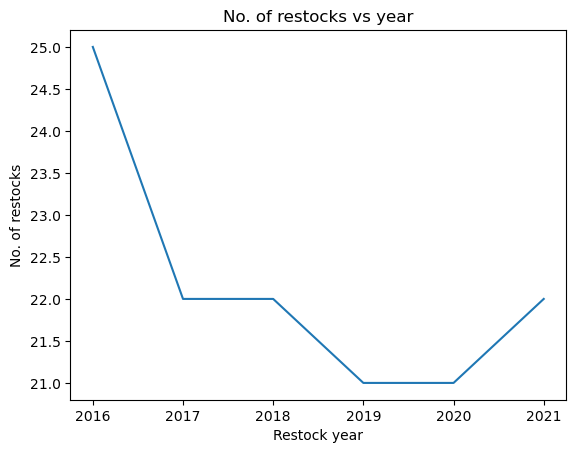

In [309]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

Final_Result.groupby('year')['restock'].median().plot()
plt.xlabel('Restock year')
plt.ylabel('No. of restocks')
plt.title("No. of restocks vs year")

Text(0.5, 1.0, 'No. of restocks vs year')

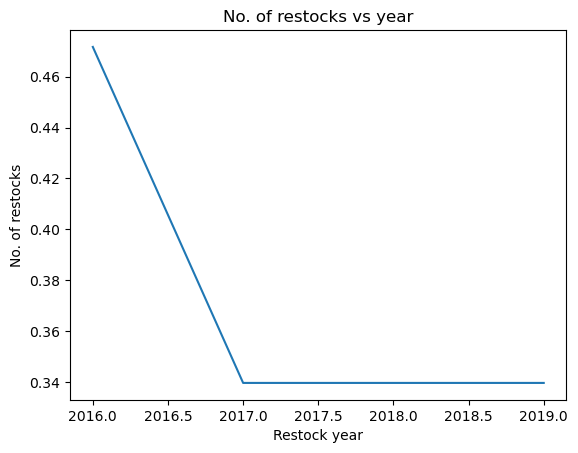

In [310]:
train_data.groupby('release_year')['restock'].median().plot()
plt.xlabel('Restock year')
plt.ylabel('No. of restocks')
plt.title("No. of restocks vs year")

In [311]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(Final_Result[feature].unique())<25 and feature not in year_feature+['release_date']+['external_code']+['retail']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [312]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature2=[feature for feature in numerical_features2 if len(train_data[feature].unique())<25 and feature not in year_feature2+['release_date']+['external_code']+['retail']]
print("Discrete Variables Count: {}".format(len(discrete_feature2)))

Discrete Variables Count: 2


In [313]:
discrete_feature

['0_x', '1_x']

In [314]:
discrete_feature2

['0', '1']

In [315]:
Final_Result[discrete_feature].head()

,0_x,1_x
0,1.0,3.0
1,1.0,3.0
2,1.0,3.0
3,1.0,1.0
4,1.0,1.0


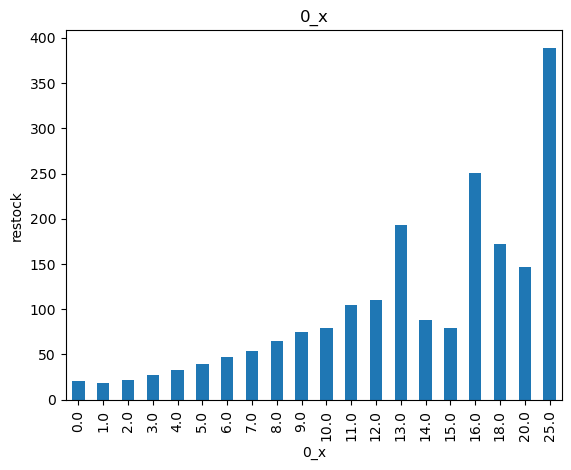

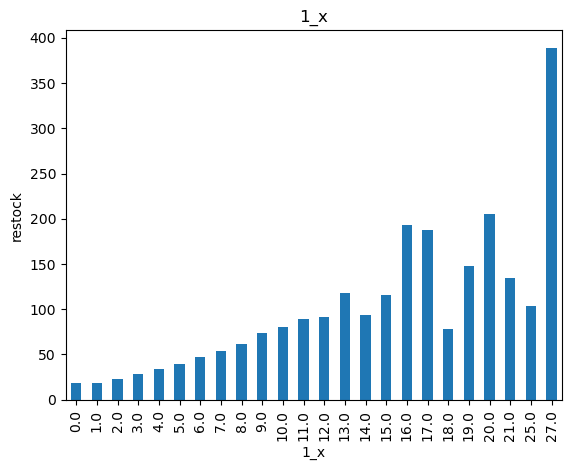

In [316]:
## Lets Find the realtionship between them and restock

for feature in discrete_feature:
    data=Final_Result.copy()
    data.groupby(feature)['restock'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('restock')
    plt.title(feature)
    plt.show()

In [317]:
## There is a relationship between variable number and restock values
## if in the first month or second month of the year there is a increase in scales for a certain product the restock is also more.

**Continuous Variable**

In [324]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['release_date']+['external_code']+['retail']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 26


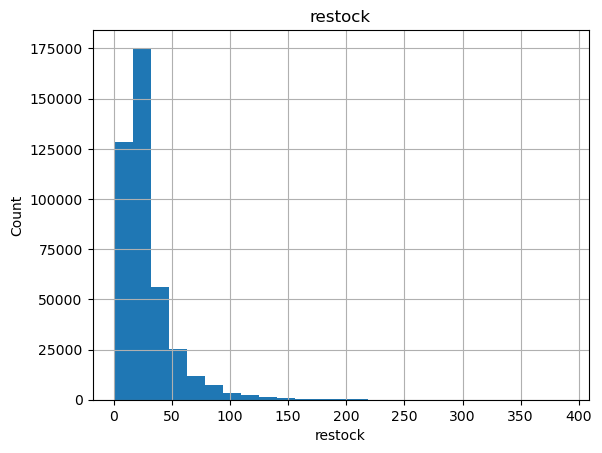

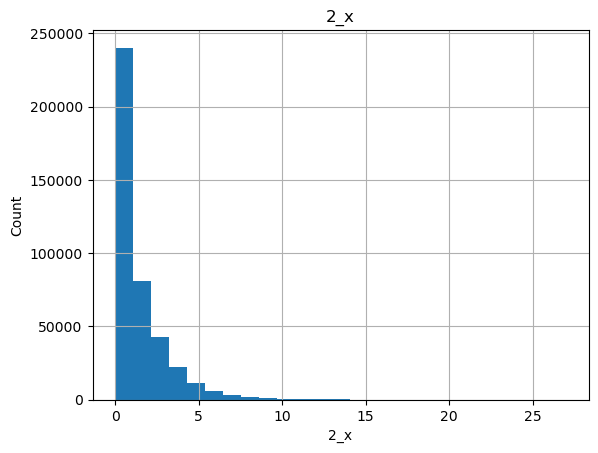

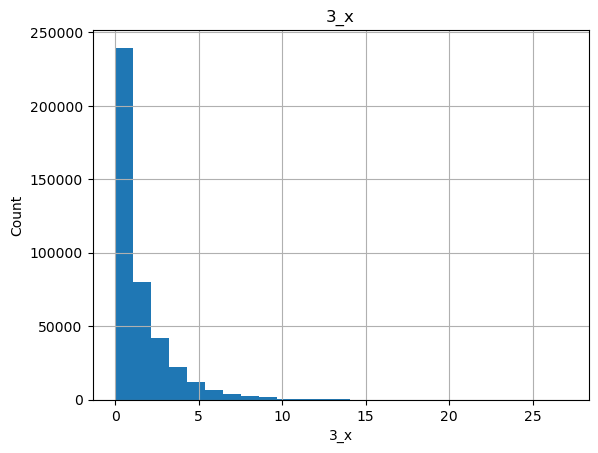

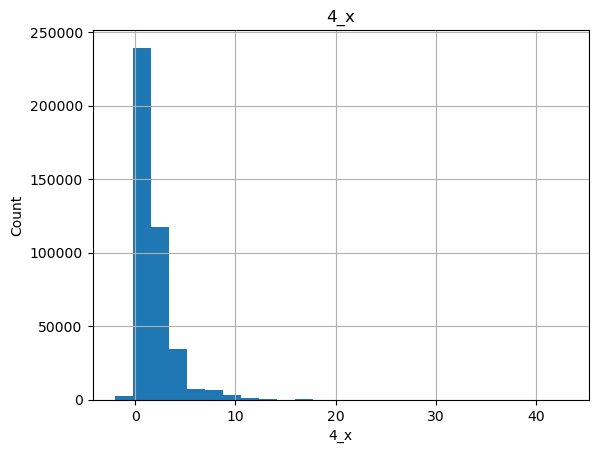

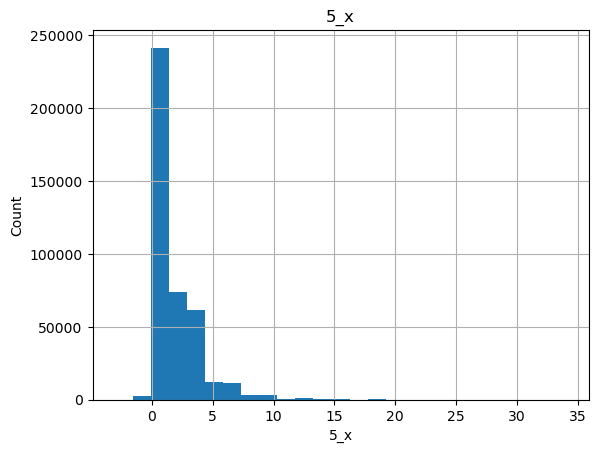

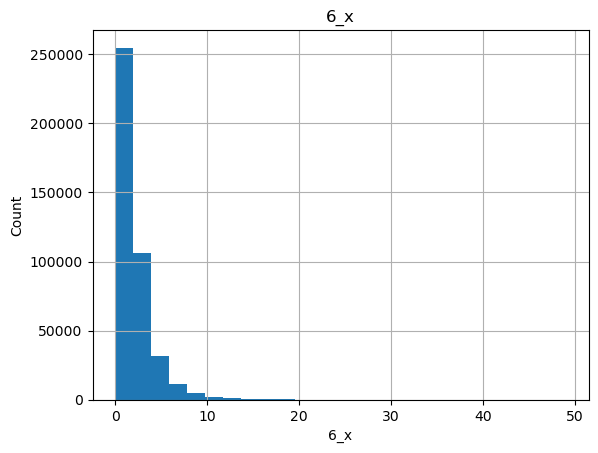

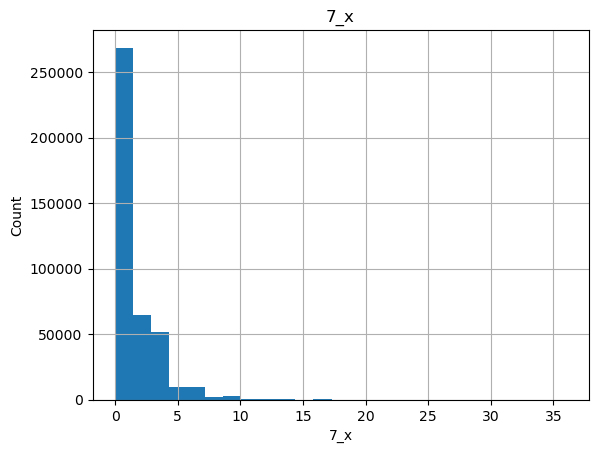

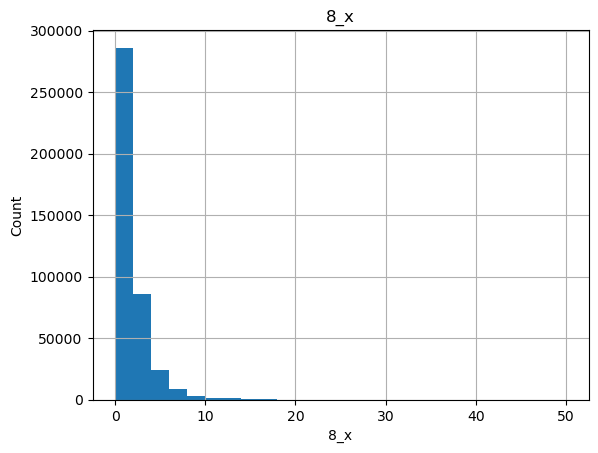

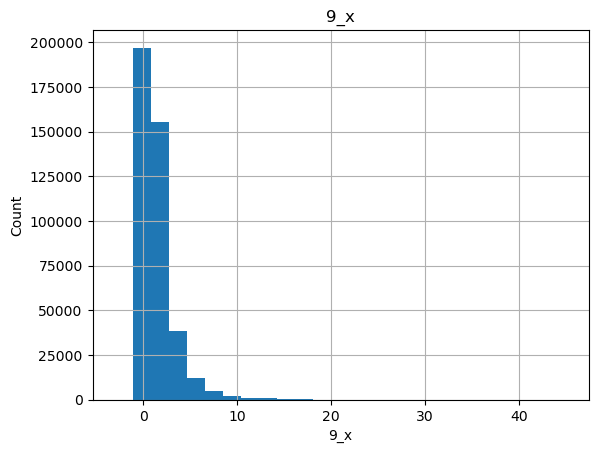

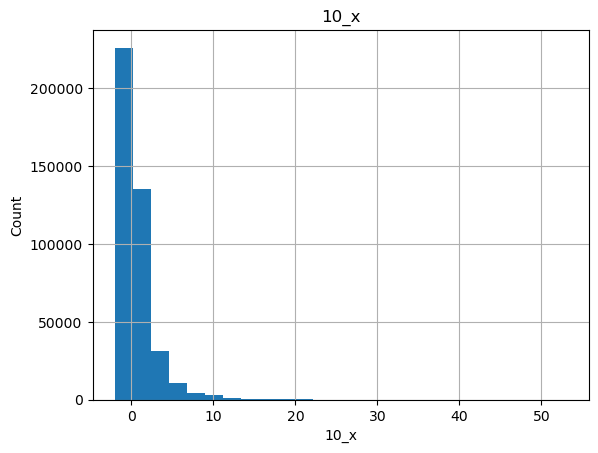

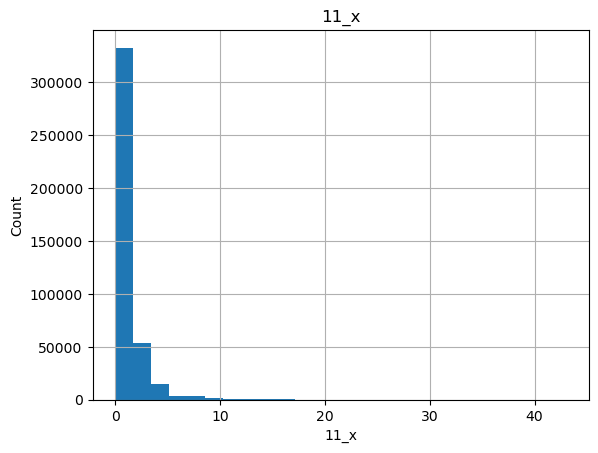

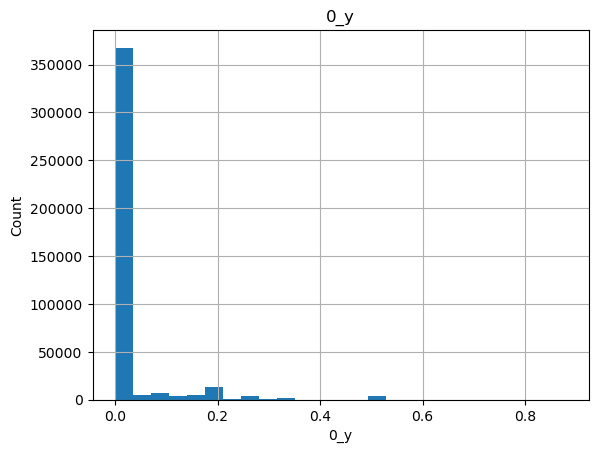

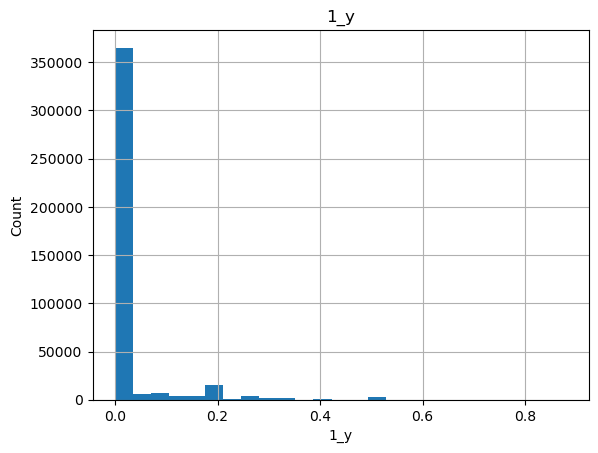

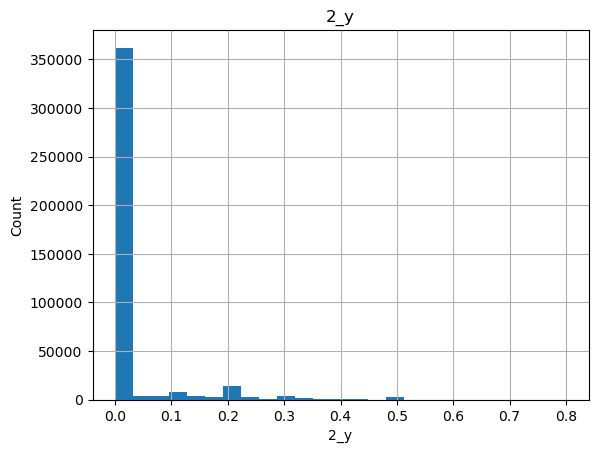

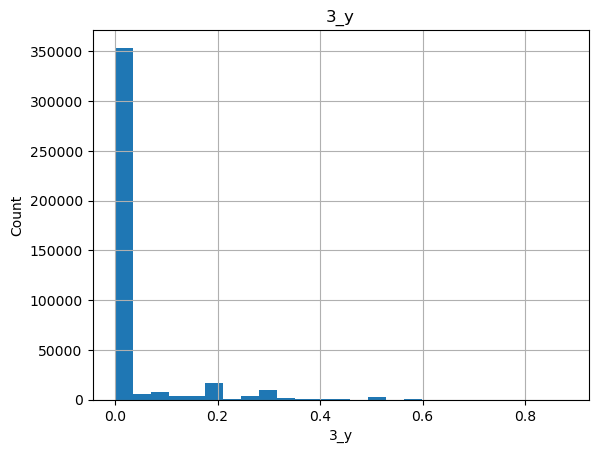

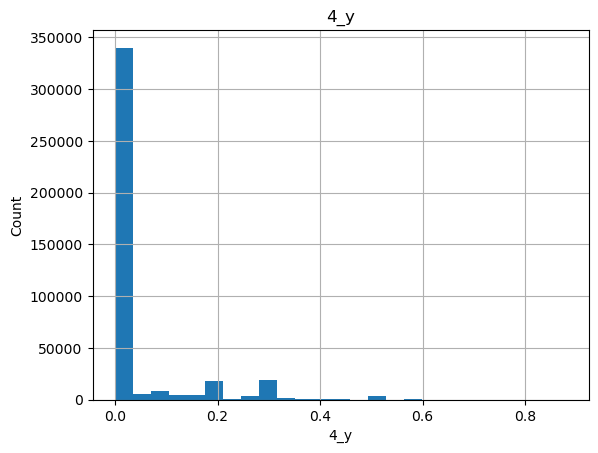

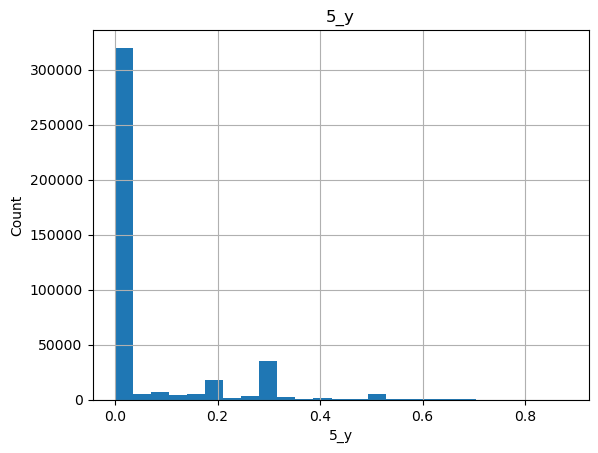

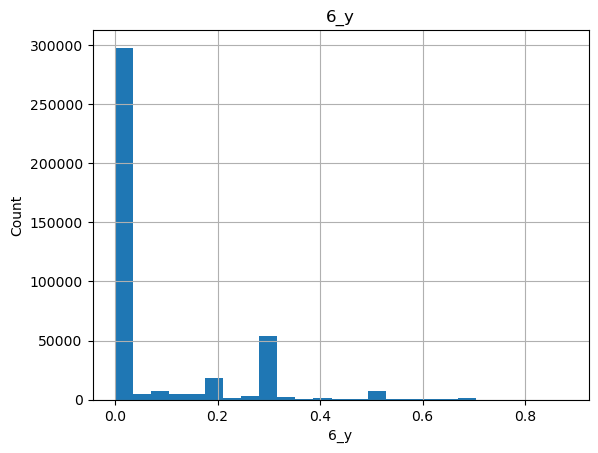

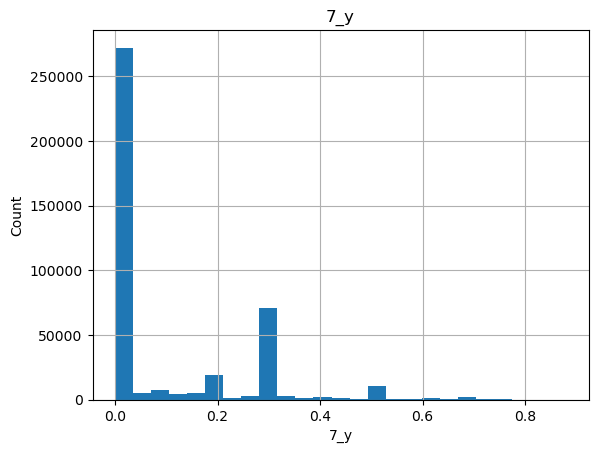

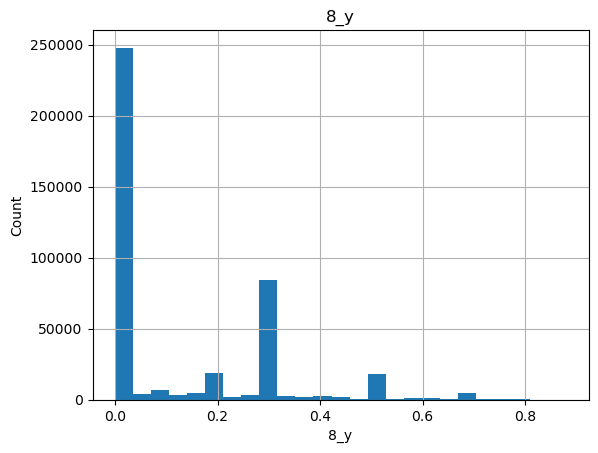

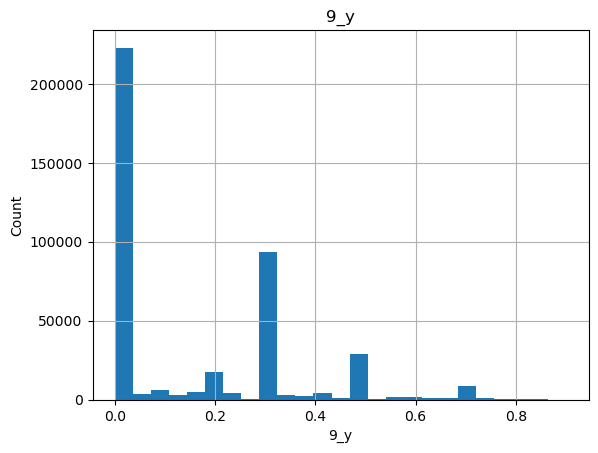

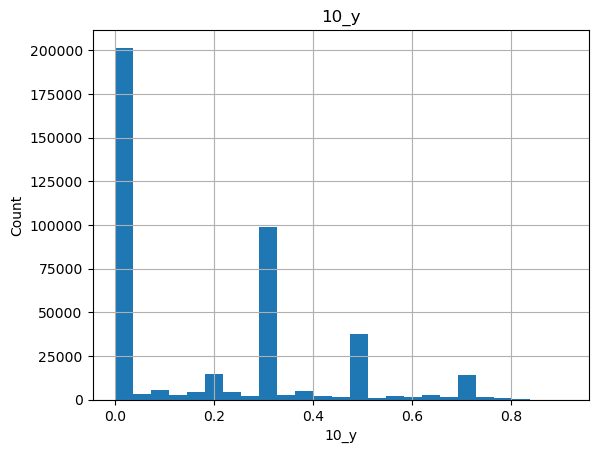

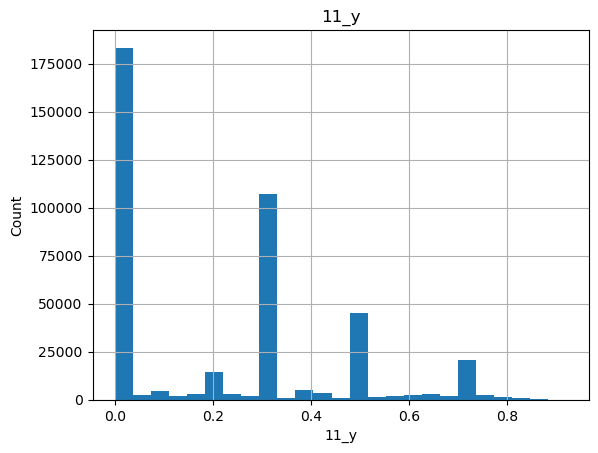

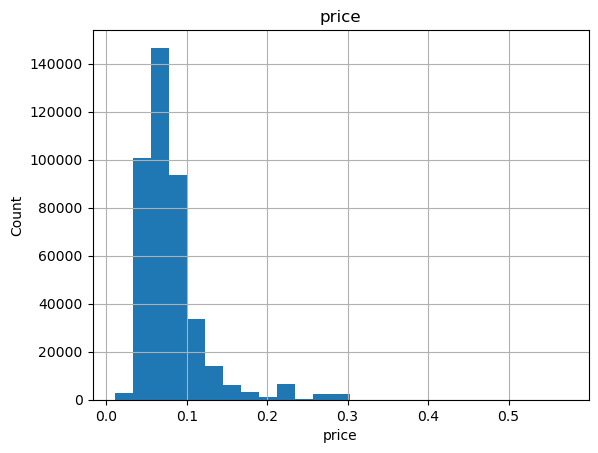

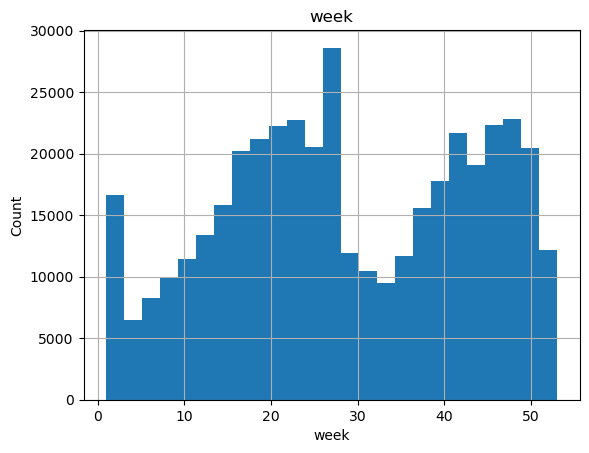

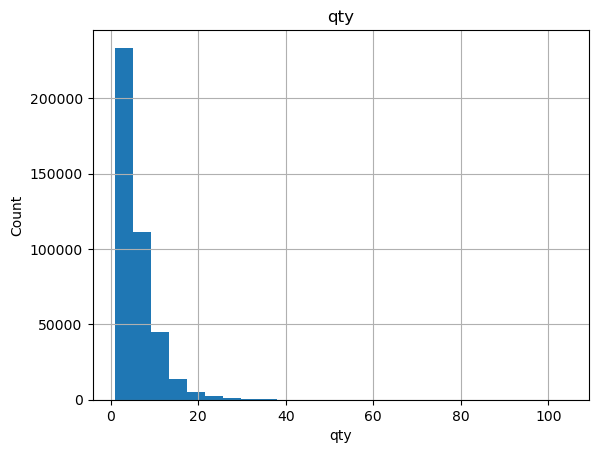

In [325]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=Final_Result.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

- Most of the features are right skewed
* I was thinking if we need to remove Week

In [326]:
continuous_feature2=[feature for feature in numerical_features2 if feature not in discrete_feature2+year_feature2+['release_date']+['external_code']+['retail']]
print("Continuous feature Count {}".format(len(continuous_feature2)))

Continuous feature Count 11


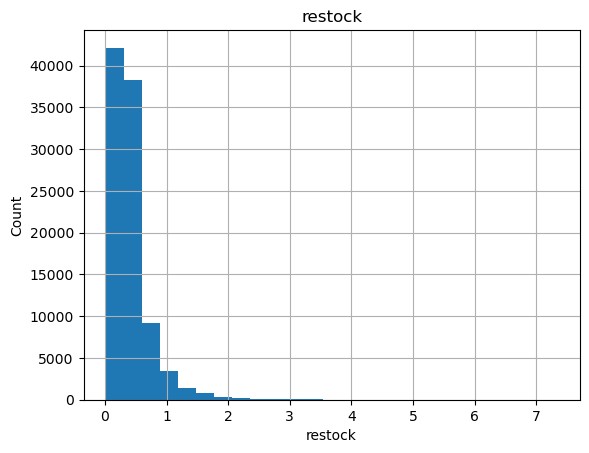

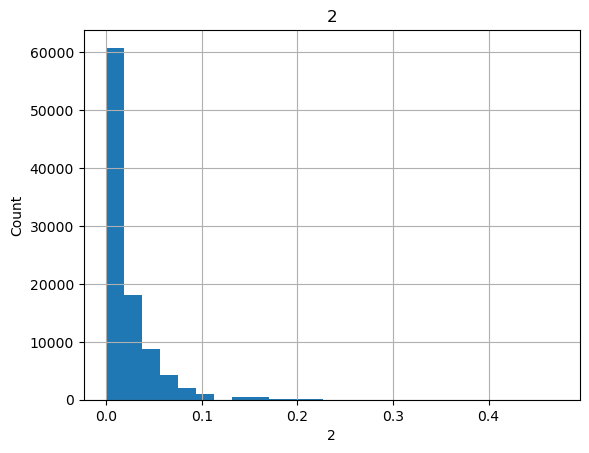

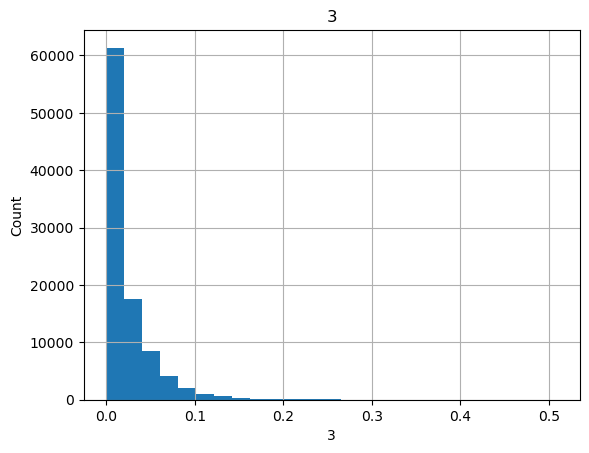

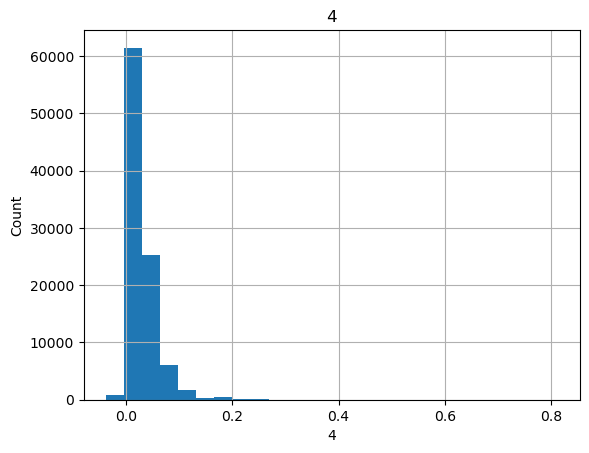

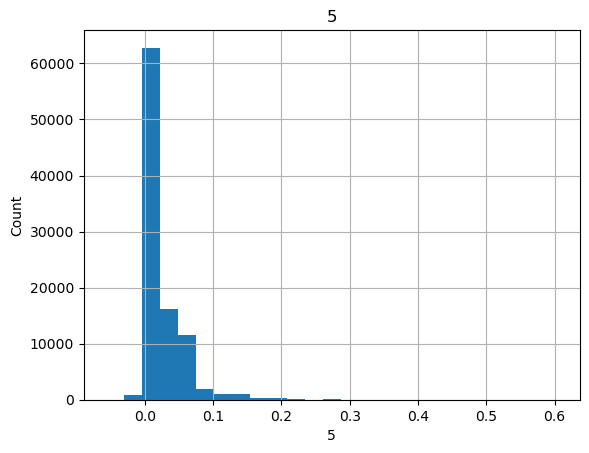

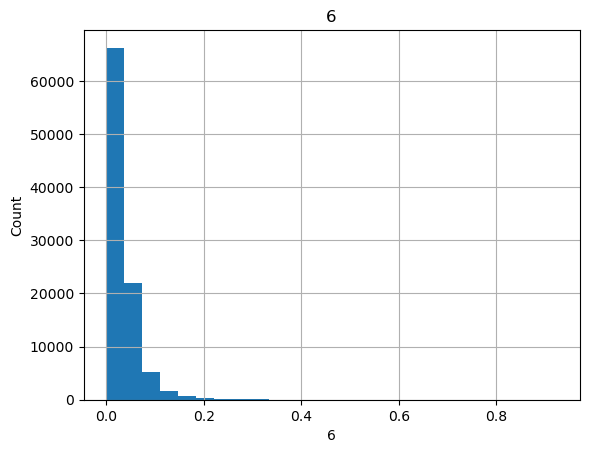

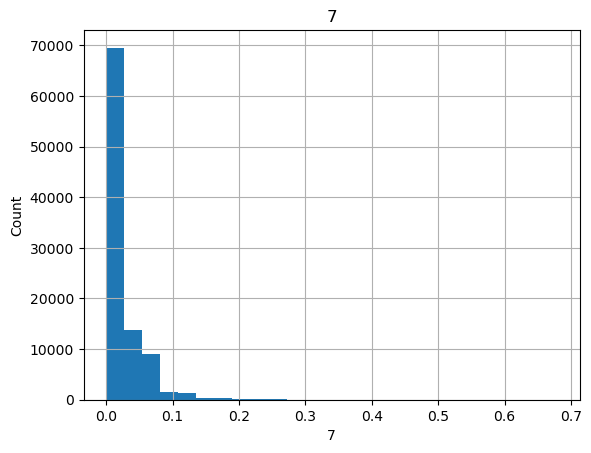

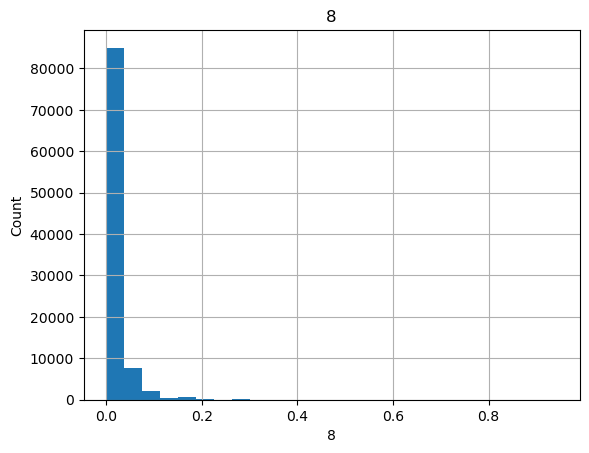

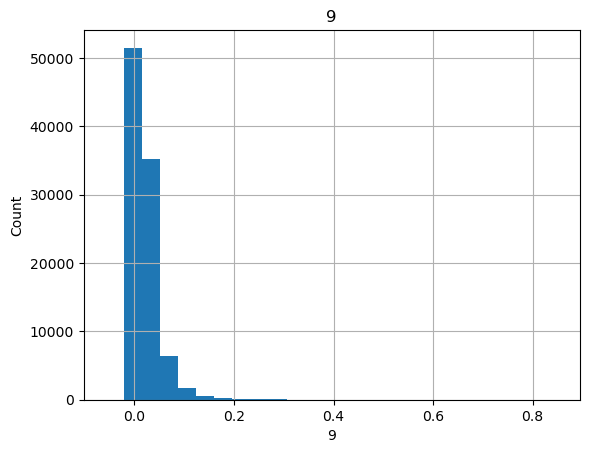

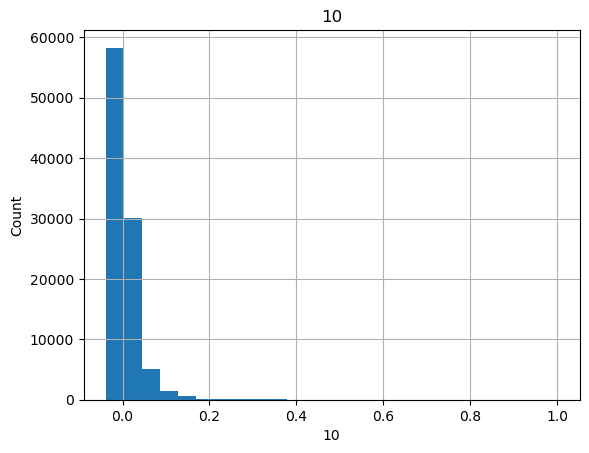

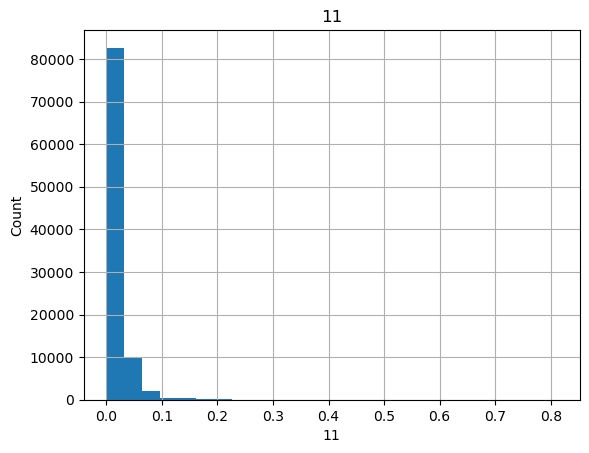

In [327]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature2:
    data=train_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

**Outliners** 

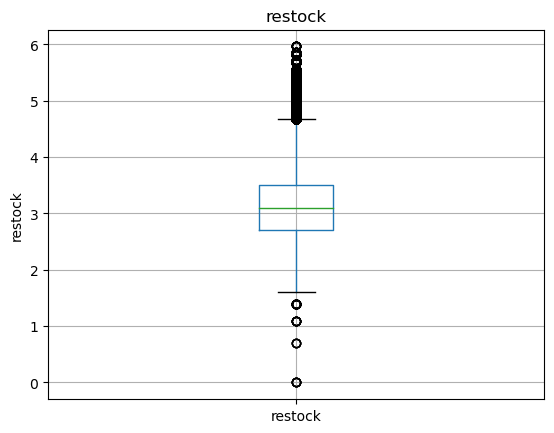

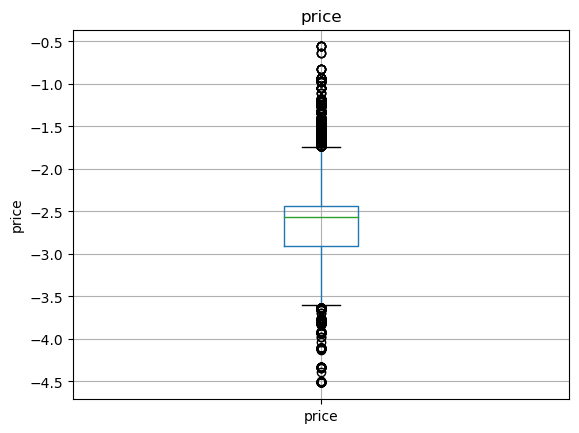

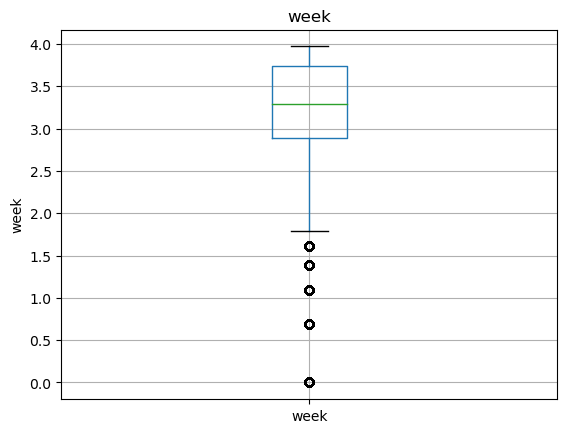

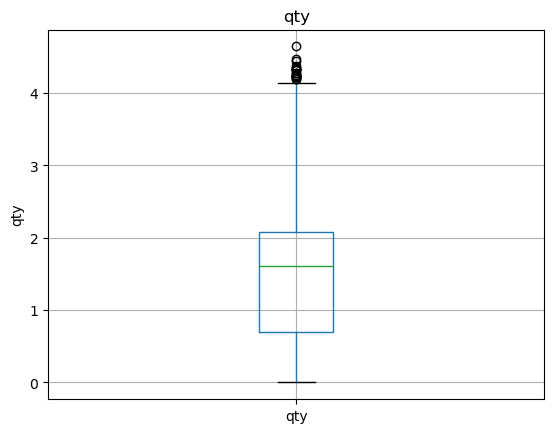

In [328]:
for feature in continuous_feature:
    data=Final_Result.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

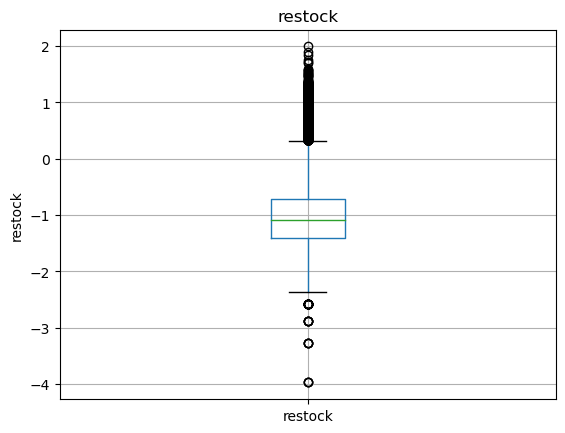

In [329]:
for feature in continuous_feature2:
    data=train_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

**Categorical Variables**

In [330]:
categorical_features = [feature for feature in Final_Result.columns if Final_Result[feature].dtypes == 'O']
categorical_features

['season', 'category', 'color', 'image_path', 'fabric']

In [331]:
Final_Result[categorical_features].head()

,season,category,color,image_path,fabric
0,SS17,long sleeve,grey,PE17/00005.png,acrylic
1,SS17,long sleeve,grey,PE17/00005.png,acrylic
2,SS17,long sleeve,grey,PE17/00005.png,acrylic
3,SS17,long sleeve,violet,PE17/00002.png,acrylic
4,SS17,long sleeve,violet,PE17/00002.png,acrylic


In [332]:
categorical_features2=[feature for feature in train_data.columns if data[feature].dtypes=='O']
categorical_features

['season', 'category', 'color', 'image_path', 'fabric']

In [333]:
train_data[categorical_features].head()

,season,category,color,image_path,fabric
0,SS17,long sleeve,grey,PE17/00005.png,acrylic
1,SS17,long sleeve,violet,PE17/00002.png,acrylic
2,SS17,long sleeve,grey,PE17/00005.png,acrylic
3,SS17,culottes,yellow,PE17/00009.png,scuba crepe
4,SS17,long sleeve,grey,PE17/00005.png,acrylic


In [334]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(Final_Result[feature].unique())))

The feature is season and number of categories are 6
The feature is category and number of categories are 27
The feature is color and number of categories are 10
The feature is image_path and number of categories are 5346
The feature is fabric and number of categories are 59


In [335]:
for feature in categorical_features2:
    print('The feature is {} and number of categories are {}'.format(feature,len(train_data[feature].unique())))

The feature is season and number of categories are 6
The feature is category and number of categories are 27
The feature is color and number of categories are 10
The feature is image_path and number of categories are 5109
The feature is fabric and number of categories are 59


In [336]:
## Finding the relationship between categorical variable and dependent feature Restock

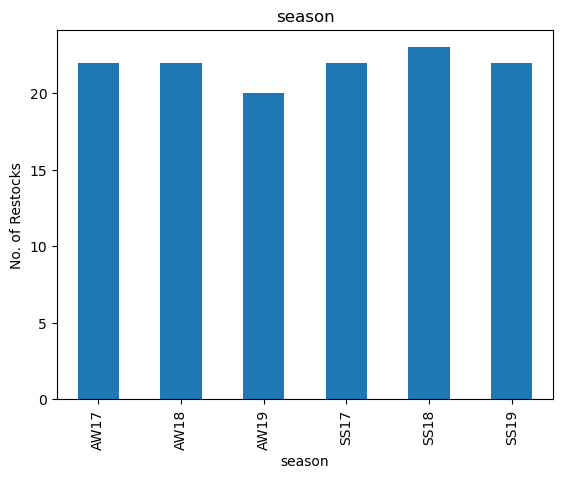

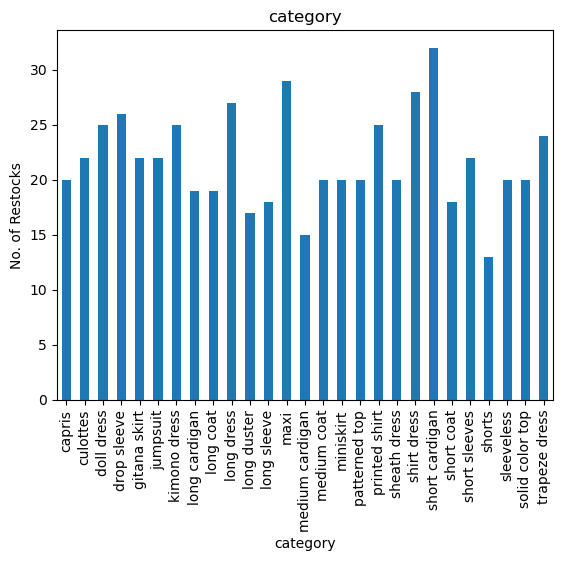

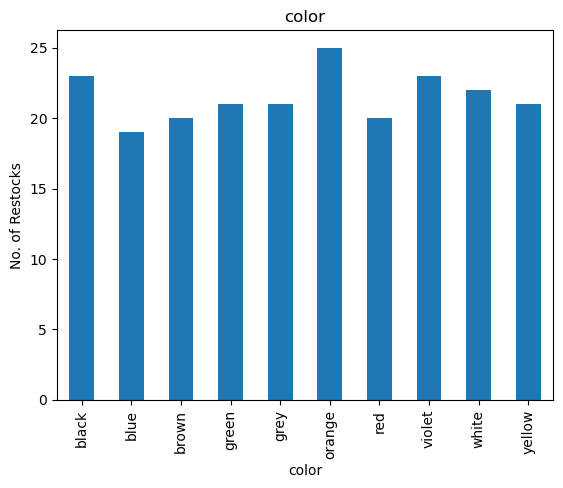

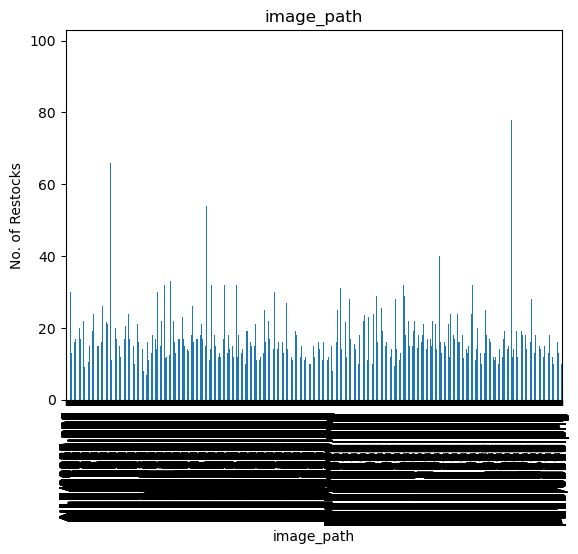

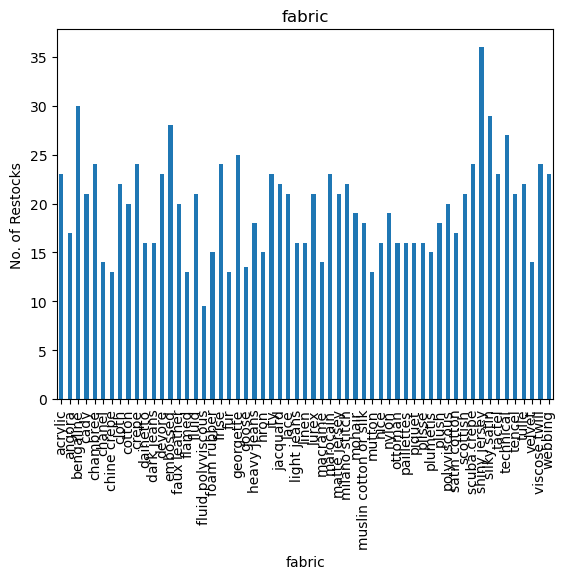

In [337]:
for feature in categorical_features:
    data=Final_Result.copy()
    data.groupby(feature)['restock'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('No. of Restocks')
    plt.title(feature)
    plt.show()

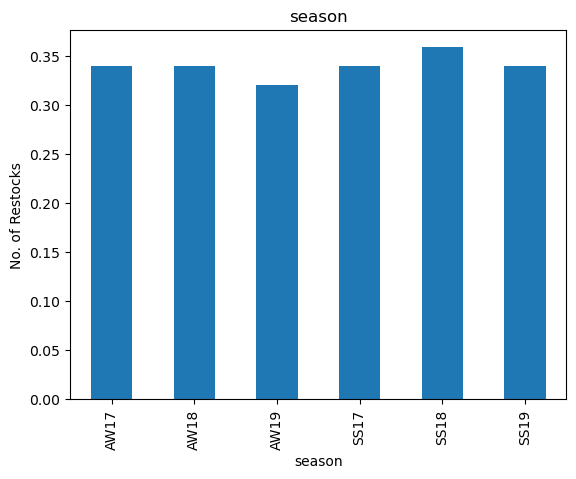

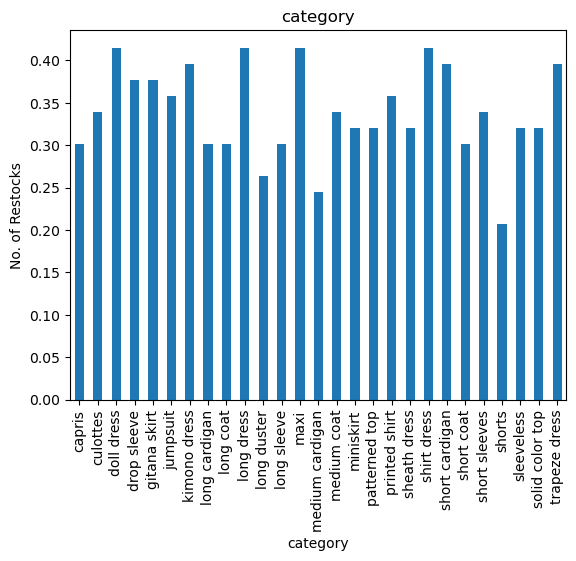

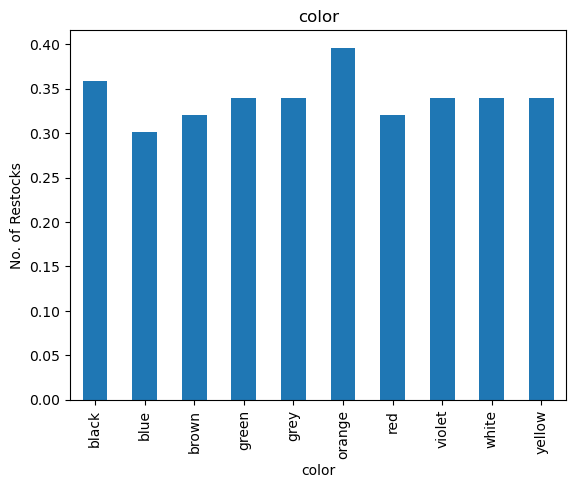

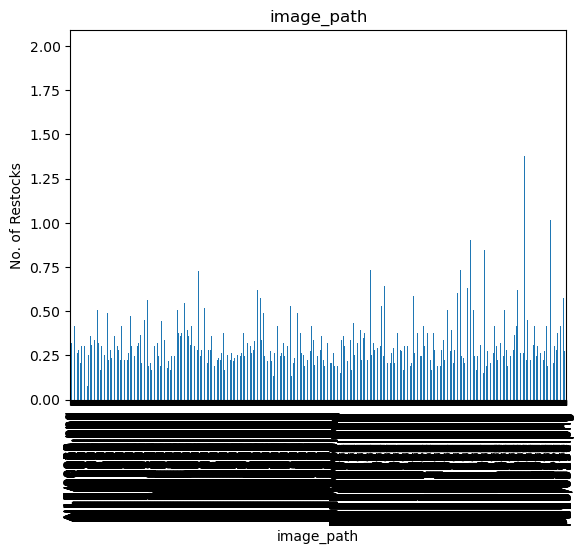

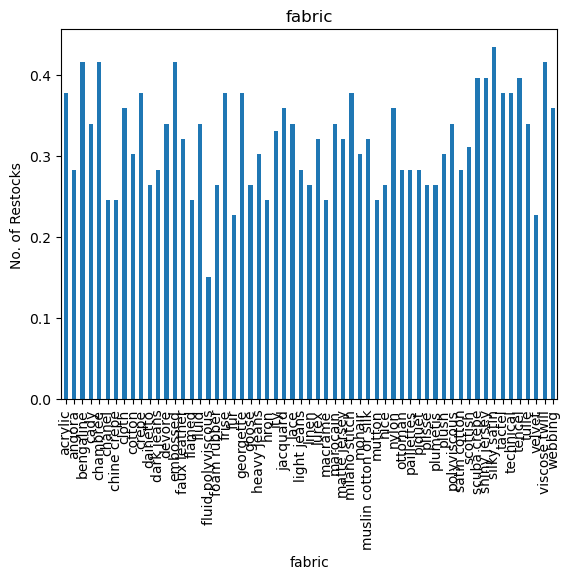

In [338]:
for feature in categorical_features2:
    data=train_data.copy()
    data.groupby(feature)['restock'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('No. of Restocks')
    plt.title(feature)
    plt.show()